<a href="https://colab.research.google.com/github/souhirbenamor/EPF/blob/main/LASSO_Regression_Models_For_Bridging.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [145]:
# load and summarize the housing dataset
from pandas import read_csv
from matplotlib import pyplot
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [148]:
# load dataset
data =pd.read_excel('/content/EEMD_4.xlsx')
print(data)


                         Date      Real  Fundamental
0     2014-12-31 23:59:59.991  5.044600    -1.545283
1     2015-01-01 00:59:59.991  5.429901    -1.622732
2     2015-01-01 01:59:59.991  5.831181    -1.659301
3     2015-01-01 02:59:59.991  6.242751    -1.651839
4     2015-01-01 03:59:59.991  6.651604    -1.596283
...                       ...       ...          ...
52603 2020-12-31 18:59:59.980  1.442024    -1.644125
52604 2020-12-31 19:59:59.980  1.632126    -1.506409
52605 2020-12-31 20:59:59.980  1.753448    -1.386974
52606 2020-12-31 21:59:59.980  1.807413    -1.285810
52607 2020-12-31 22:59:59.980  1.798362    -1.202211

[52608 rows x 3 columns]


In [149]:
from sklearn import linear_model
from sklearn.linear_model import Lasso
from sklearn.preprocessing import MinMaxScaler, RobustScaler 
from sklearn.model_selection import train_test_split

In [150]:

# define model
model = Lasso(alpha=1.0)

In [151]:

# Define Features X and exogenious y
X = data.iloc[:, 2:]
y= data.iloc[:, 1]
print(X)
#print(y)

       Fundamental
0        -1.545283
1        -1.622732
2        -1.659301
3        -1.651839
4        -1.596283
...            ...
52603    -1.644125
52604    -1.506409
52605    -1.386974
52606    -1.285810
52607    -1.202211

[52608 rows x 1 columns]


In [152]:
# Train and Test datasets

X_train = X[:-17640]; X_test = X[-17640:]
y_train = y[:-17640]; y_test = y[-17640:]
print(X_train)
print(X_test)
print(y_train)
print(y_test)

       Fundamental
0        -1.545283
1        -1.622732
2        -1.659301
3        -1.651839
4        -1.596283
...            ...
34963     3.217285
34964     3.231663
34965     3.191198
34966     3.113380
34967     3.013612

[34968 rows x 1 columns]
       Fundamental
34968    10.230597
34969    10.429440
34970    10.634185
34971    10.842973
34972    11.050921
...            ...
52603    -1.644125
52604    -1.506409
52605    -1.386974
52606    -1.285810
52607    -1.202211

[17640 rows x 1 columns]
0        5.044600
1        5.429901
2        5.831181
3        6.242751
4        6.651604
           ...   
34963    3.814181
34964    3.669336
34965    3.500265
34966    3.338328
34967    3.202054
Name: Real, Length: 34968, dtype: float64
34968    6.940801
34969    7.226653
34970    7.556201
34971    7.923198
34972    8.315429
           ...   
52603    1.442024
52604    1.632126
52605    1.753448
52606    1.807413
52607    1.798362
Name: Real, Length: 17640, dtype: float64


# Scaling data **in case we don't use the decomposition data** since the decomposition code inclide the scaling code( see EEMD)

In [65]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [66]:
#Scaling data
#Scaling X_train
import numpy as np
import pandas as pd
import csv
scaler = MinMaxScaler(feature_range = (-1,1)) 
X_train = pd.DataFrame(X_train)
X_train[X_train.columns] = scaler.fit_transform(X_train[X_train.columns].values.reshape(-1,1))
X_train  = pd.DataFrame(X_train)
X_train.to_csv("X_train.csv", header=False, quoting=csv.QUOTE_NONE, escapechar=' ')
print(X_train)
#Scaling X_test
X_test = pd.DataFrame(X_test)
X_test[X_test.columns] = scaler.fit_transform(X_test[X_test.columns].values.reshape(-1,1))
X_test  = pd.DataFrame(X_test)
X_test.to_csv("X_test.csv", header=False, quoting=csv.QUOTE_NONE, escapechar=' ')
print(X_test)
#Scaling y_train
y_train = pd.DataFrame(y_train)
y_train = scaler.fit_transform(y_train.values.reshape(-1,1))
y_train  = pd.DataFrame(y_train)
y_train.to_csv("y_train.csv", header=False, quoting=csv.QUOTE_NONE, escapechar=' ')
print(y_train)
#Scaling y_test
y_test = pd.DataFrame(y_test)
y_test = scaler.fit_transform(y_test.values.reshape(-1,1))
y_test  = pd.DataFrame(y_test)
y_test.to_csv("y_test.csv", header=False, quoting=csv.QUOTE_NONE, escapechar=' ')
print(y_test)


       Estimated price 
0             -0.458434
1             -0.463329
2             -0.465514
3             -0.450271
4             -0.518237
...                 ...
34963         -0.005251
34964         -0.127922
34965         -0.172152
34966         -0.172049
34967         -0.172049

[34968 rows x 1 columns]
       Estimated price 
34968         -0.152329
34969         -0.152329
34970         -0.152329
34971         -0.152329
34972         -0.152329
...                 ...
52603         -0.021901
52604         -0.106630
52605         -0.106630
52606         -0.106630
52607         -0.147226

[17640 rows x 1 columns]
              0
0      0.010729
1     -0.004598
2     -0.014407
3     -0.012023
4     -0.015088
...         ...
34963  0.362964
34964  0.312285
34965  0.326317
34966  0.273117
34967  0.227002

[34968 rows x 1 columns]
              0
0     -0.034580
1     -0.040165
2     -0.044854
3     -0.047888
4     -0.035821
...         ...
17635  0.011619
17636 -0.017756
17637 -0.0

# when using decomposed data



In [153]:
import numpy as np
import pandas as pd
X_train = pd.DataFrame(X_train)
X_train[X_train.columns] = X_train[X_train.columns].values.reshape(-1,1)
print(X_train)
#Scaling X_test
X_test = pd.DataFrame(X_test)
X_test[X_test.columns] = X_test[X_test.columns].values.reshape(-1,1)
print(X_test)
#Scaling y_train
y_train = pd.DataFrame(y_train)
y_train = y_train.values.reshape(-1,1)
print(y_train)
#Scaling y_test
y_test = pd.DataFrame(y_test)
y_test = y_test.values.reshape(-1,1)
print(y_test)

       Fundamental
0        -1.545283
1        -1.622732
2        -1.659301
3        -1.651839
4        -1.596283
...            ...
34963     3.217285
34964     3.231663
34965     3.191198
34966     3.113380
34967     3.013612

[34968 rows x 1 columns]
       Fundamental
34968    10.230597
34969    10.429440
34970    10.634185
34971    10.842973
34972    11.050921
...            ...
52603    -1.644125
52604    -1.506409
52605    -1.386974
52606    -1.285810
52607    -1.202211

[17640 rows x 1 columns]
[[5.04460037]
 [5.42990091]
 [5.83118085]
 ...
 [3.50026519]
 [3.33832768]
 [3.20205409]]
[[6.94080099]
 [7.22665285]
 [7.55620095]
 ...
 [1.75344766]
 [1.80741321]
 [1.79836179]]


In [154]:
import os
import pandas
import numpy as np
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape
from sklearn.linear_model import Lasso
lasso_model = Lasso(alpha=1.0)
lasso=lasso_model.fit(X_train , y_train)

lasso_predict = lasso.predict(X_test)
# Reshap only if we use the scaler code 
lasso_predict=lasso_predict.reshape(-1,1)
#######
Lasso_MAPE = MAPE(y_test,lasso_predict) 
print("MAPE value: ",Lasso_MAPE)
Accuracy = 100 - Lasso_MAPE
print("Accuracy of Lasso Regression: ",Accuracy)
#print('Accuracy of Lasso Regression: {:0.2f}%.'.format(Accuracy))


MAPE value:  265.3702964064404
Accuracy of Lasso Regression:  -165.3702964064404


In [155]:
import pandas as pd
from pandas import read_csv
import csv
#save decomposed data

lasso_predict  = pd.DataFrame(lasso_predict )

lasso_predict.to_csv("lasso_predict.csv", header=False, quoting=csv.QUOTE_NONE, escapechar=' ')

print(lasso_predict )

              0
0      7.657265
1      7.805698
2      7.958537
3      8.114393
4      8.269623
...         ...
17635 -1.207005
17636 -1.104203
17637 -1.015047
17638 -0.939530
17639 -0.877124

[17640 rows x 1 columns]


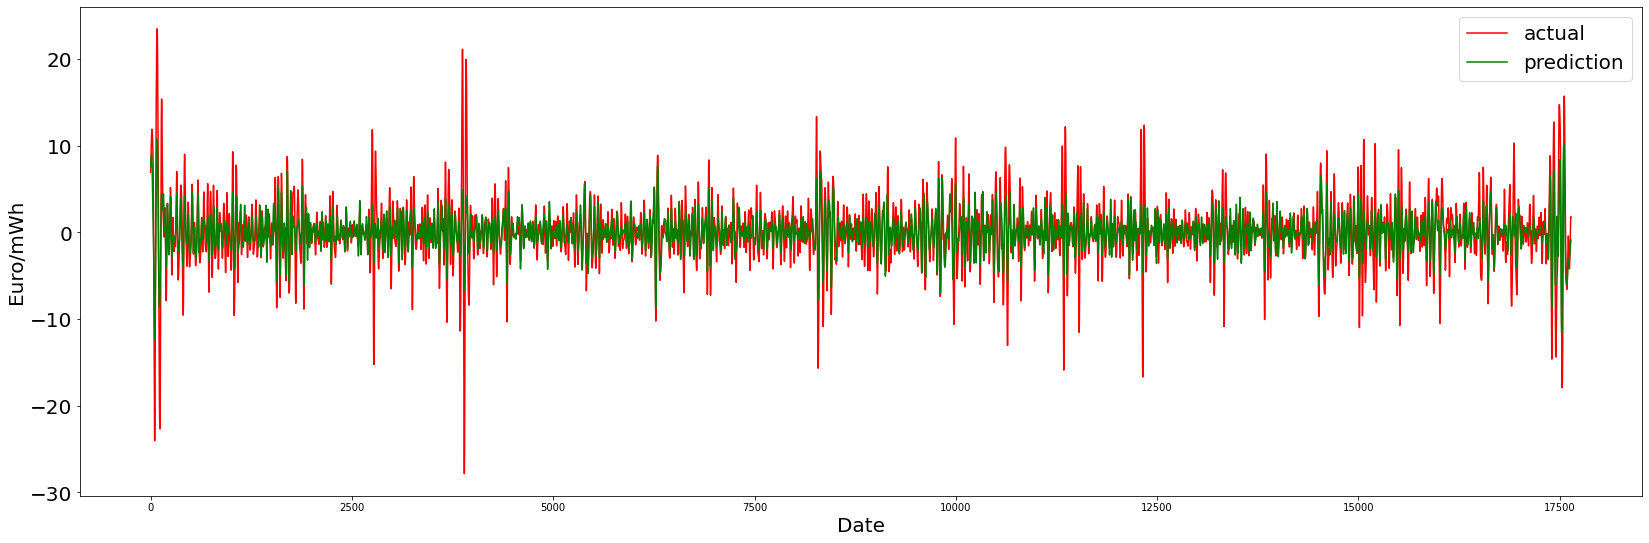

In [156]:
#Plot Prediction and Actual series

fig, ax = plt.subplots(figsize = (28,9))
ax.set_xlabel('Date', fontsize=20)
ax.set_ylabel('Euro/mWh', fontsize=20)
ax.plot(y_test, label = 'actual', color = 'r')
ax.plot(lasso_predict, label = 'prediction', color = 'g')
ax.tick_params(axis='y', labelsize = 20)
ax.legend(prop={'size': 20})